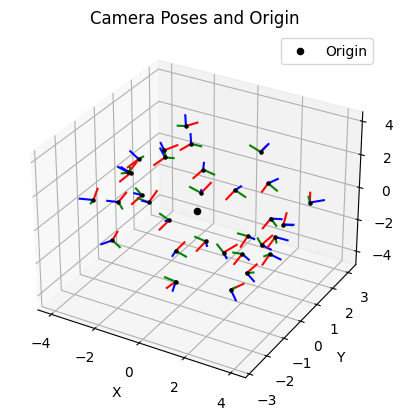

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your JSON file
with open('/home/sharma/MonoHair/data/vcistefan/colmap/cam_params.json', 'r') as f:
    data = json.load(f)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot origin
ax.scatter(0, 0, 0, c='k', marker='o', label='Origin')

# Loop through each camera
for cam in data['cam_list']:
    pose = np.array(cam['pose'])

    # Extract camera center (translation vector)
    cam_center = pose[:3, 3]
    ax.scatter(*cam_center, c='black', marker='.')  # Plot camera position

    # Optional: Draw camera axis
    rot = pose[:3, :3]
    axis_len = 0.5
    x_axis = cam_center + rot[:, 0] * axis_len
    y_axis = cam_center + rot[:, 1] * axis_len
    z_axis = cam_center + rot[:, 2] * axis_len
    ax.plot([cam_center[0], x_axis[0]], [cam_center[1], x_axis[1]], [cam_center[2], x_axis[2]], c='r')
    ax.plot([cam_center[0], y_axis[0]], [cam_center[1], y_axis[1]], [cam_center[2], y_axis[2]], c='g')
    ax.plot([cam_center[0], z_axis[0]], [cam_center[1], z_axis[1]], [cam_center[2], z_axis[2]], c='b')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Camera Poses and Origin')
ax.legend()
plt.show()

In [5]:
import cv2
import os
import numpy as np

# Input directories
image_dir = "/home/sharma/MonoHair/data/vcistefan/colmap/images"      # RGB images
depth_dir = "/home/sharma/MonoHair/data/vcistefan/render_depth"       # Grayscale depth maps

# Output directory for overlays
output_dir = "/home/sharma/MonoHair/data/vcistefan/overlay3"
os.makedirs(output_dir, exist_ok=True)

def is_image_file(filename):
    return filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))

# Get only image files
image_filenames = sorted([f for f in os.listdir(image_dir) if is_image_file(f)])
depth_filenames = sorted([f for f in os.listdir(depth_dir) if is_image_file(f)])

for img_file, depth_file in zip(image_filenames, depth_filenames):
    # Read the image and depth map
    img_path = os.path.join(image_dir, img_file)
    depth_path = os.path.join(depth_dir, depth_file)

    image = cv2.imread(img_path)
    depth = cv2.imread(depth_path, cv2.IMREAD_GRAYSCALE)

    if image is None or depth is None:
        print(f"Skipping {img_file} or {depth_file}, couldn't read.")
        continue

    # Resize depth map if it doesn't match the image
    if (image.shape[:2] != depth.shape):
        print(f"Resizing depth {depth_file} to match image {img_file}")
        depth = cv2.resize(depth, (image.shape[1], image.shape[0]))

    # Normalize depth for better contrast
    depth_norm = cv2.normalize(depth, None, 0, 255, cv2.NORM_MINMAX)
    depth_color = cv2.cvtColor(depth_norm.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    # Blend depth map on top of RGB image
    blended = cv2.addWeighted(image, 0.6, depth_color, 0.4, 0)

    # Save the overlay
    output_path = os.path.join(output_dir, f"overlay_{os.path.splitext(img_file)[0]}.jpg")
    cv2.imwrite(output_path, blended)

    print(f"Saved overlay to {output_path}")


Saved overlay to /home/sharma/MonoHair/data/vcistefan/overlay3/overlay_C0000.jpg
Saved overlay to /home/sharma/MonoHair/data/vcistefan/overlay3/overlay_C0001.jpg
Saved overlay to /home/sharma/MonoHair/data/vcistefan/overlay3/overlay_C0004.jpg
Saved overlay to /home/sharma/MonoHair/data/vcistefan/overlay3/overlay_C0005.jpg
Saved overlay to /home/sharma/MonoHair/data/vcistefan/overlay3/overlay_C0006.jpg
Saved overlay to /home/sharma/MonoHair/data/vcistefan/overlay3/overlay_C0007.jpg
Saved overlay to /home/sharma/MonoHair/data/vcistefan/overlay3/overlay_C0008.jpg
Saved overlay to /home/sharma/MonoHair/data/vcistefan/overlay3/overlay_C0010.jpg
Saved overlay to /home/sharma/MonoHair/data/vcistefan/overlay3/overlay_C0012.jpg
Saved overlay to /home/sharma/MonoHair/data/vcistefan/overlay3/overlay_C0013.jpg
Saved overlay to /home/sharma/MonoHair/data/vcistefan/overlay3/overlay_C0014.jpg
Saved overlay to /home/sharma/MonoHair/data/vcistefan/overlay3/overlay_C0016.jpg
Saved overlay to /home/sharm